This project is a classification algorithm aims to predict which COVID-19 patient will survive based on demographic data and CT characteristics including severity score.

## Import libraries and setting figure properties regards their size and font size

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize': [10,10]}, font_scale=1.2)

## reading the data

In [3]:
df = pd.read_csv('ct.csv')
df

,Unnamed: 0,Age,Gender,GGO,Consolidation,Crazy_paving,CT_severity,Survival
0,0,45,1,1,1,1,24,1
1,1,59,1,1,1,0,23,1
2,2,67,0,1,1,1,23,1
3,3,30,0,1,1,1,22,1
4,4,42,1,1,1,0,21,1
...,...,...,...,...,...,...,...,...
106,106,39,0,0,1,0,6,0
107,107,49,1,1,0,0,5,0
108,108,60,1,1,1,0,5,0
109,109,27,1,1,1,0,5,0


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,Age,Gender,GGO,Consolidation,Crazy_paving,CT_severity,Survival
0,45,1,1,1,1,24,1
1,59,1,1,1,0,23,1
2,67,0,1,1,1,23,1
3,30,0,1,1,1,22,1
4,42,1,1,1,0,21,1
...,...,...,...,...,...,...,...
106,39,0,0,1,0,6,0
107,49,1,1,0,0,5,0
108,60,1,1,1,0,5,0
109,27,1,1,1,0,5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            111 non-null    int64
 1   Gender         111 non-null    int64
 2   GGO            111 non-null    int64
 3   Consolidation  111 non-null    int64
 4   Crazy_paving   111 non-null    int64
 5   CT_severity    111 non-null    int64
 6   Survival       111 non-null    int64
dtypes: int64(7)
memory usage: 6.2 KB


<AxesSubplot:>

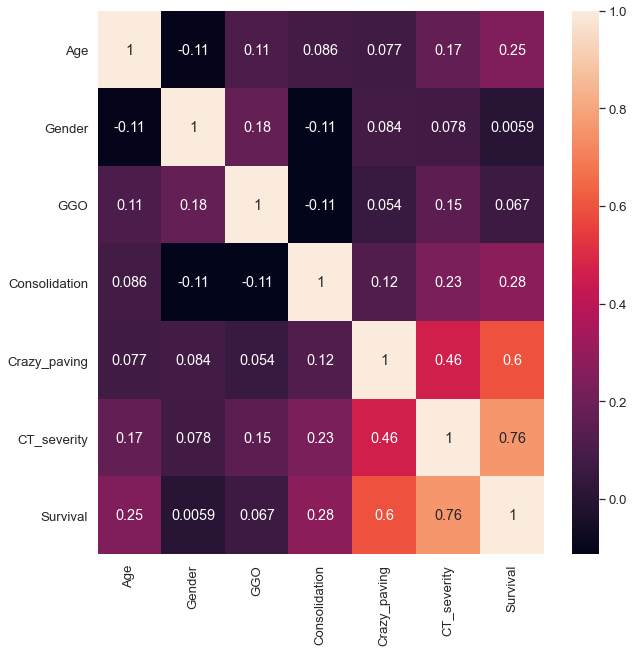

In [6]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Survival', ylabel='count'>

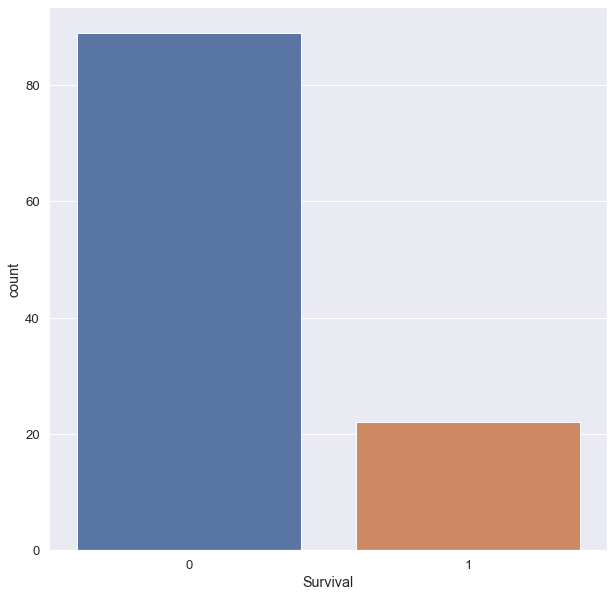

In [7]:
sns.countplot(data=df, x='Survival')

small patient number are in the death group, only 22 patietns out of 111 patients.

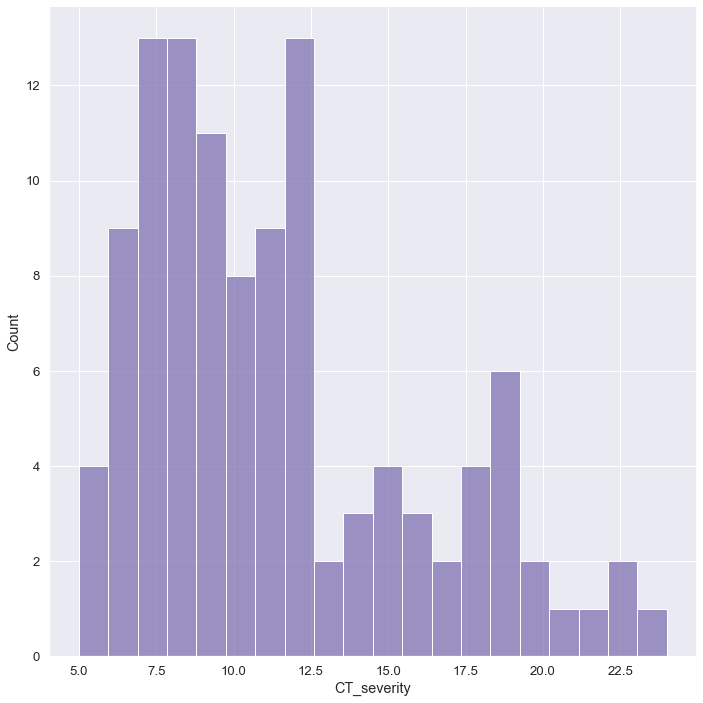

In [12]:
sns.displot(df['CT_severity'], color='m', height=10, bins=20)
# sns.displot(df['CT_severity'], color='m', height=10, bins=20)

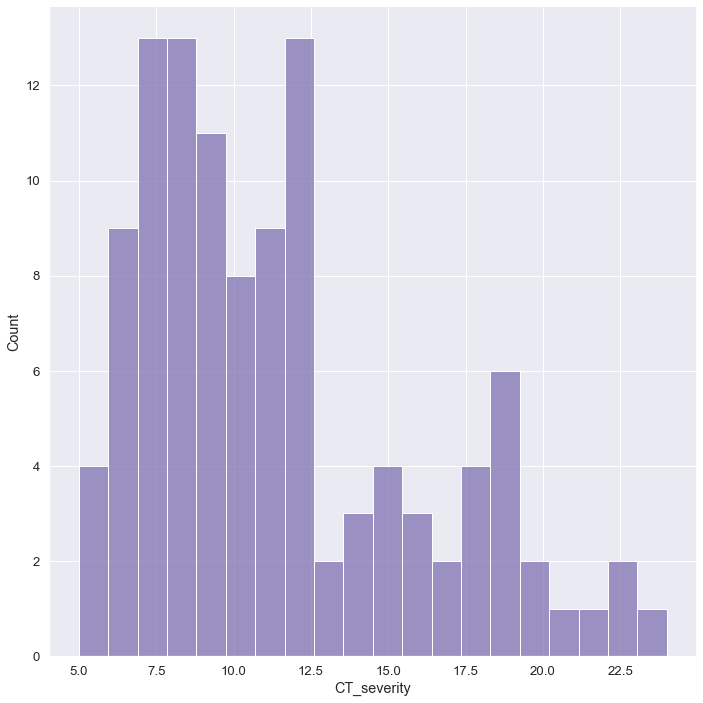

In [11]:
sns.displot(df['CT_severity'], color='m', height=10, bins=20)

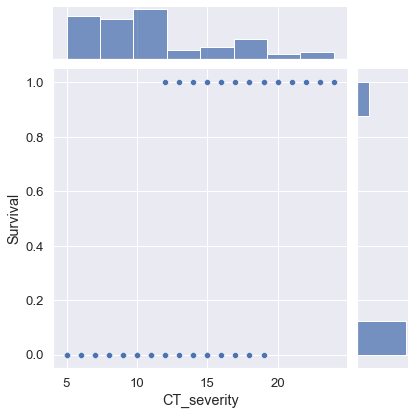

In [13]:
sns.jointplot(data=df, x='CT_severity', y='Survival')

machine learning models

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.iloc[:,:-1]
y= df.iloc[:, -1]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [21]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

In [22]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.9659090909090909
Testing Accuracy: 0.8695652173913043
Testing Confusion Matrix: 
[[16  1]
 [ 2  4]]
Testing Recall: 0.6666666666666666
Testing Precesion: 0.8
Testing F-1: 0.7272727272727272
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9318181818181818
Testing Accuracy: 0.7391304347826086
Testing Confusion Matrix: 
[[16  1]
 [ 5  1]]
Testing Recall: 0.16666666666666666
Testing Precesion: 0.5
Testing F-1: 0.25
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.9772727272727273
Testing Accuracy: 0.782608695652174
Testing Confusion Matrix: 
[[16  1]
 [ 4  2]]
Testing Recall: 0.3333333333333333
Testing Precesion: 0.6666666666666666
Testing F-1: 0.4444444444444444
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.9130434782608695
Testing Confusion Matrix: 
[[16  1]
 [ 1  5]]
Testing Recall: 0.83333333333

In [23]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
import joblib

In [25]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [26]:
x.columns

Index(['Age', 'Gender', 'GGO', 'Consolidation', 'Crazy_paving', 'CT_severity'], dtype='object')

In [27]:
input = [80, 1, 1,1,1,22]

In [28]:
input = scaler.transform([input])

In [29]:
model.predict(input)

array([1], dtype=int64)

In [30]:
input = [8, 0, 0,0,0,3]
input = scaler.transform([input])
model.predict(input)

array([0], dtype=int64)